In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
print('number of rows = ', data.shape[0])
print('number of columns = ', data.shape[1])

number of rows =  48842
number of columns =  15


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Fetch 50% random sample from the dataset

In [10]:
data_1 = data.sample(frac=0.5)

# Check null value in the dataset

In [11]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Perform data cleaning for missing value by replacing them to NaN

In [14]:
# Check the number of missing value in each column
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [15]:
import numpy as np
data['workclass'] = data['workclass'].replace('?', np.nan)
data['occupation'] = data['occupation'].replace('?', np.nan)
data['native-country'] = data['native-country'].replace('?', np.nan)

<Axes: >

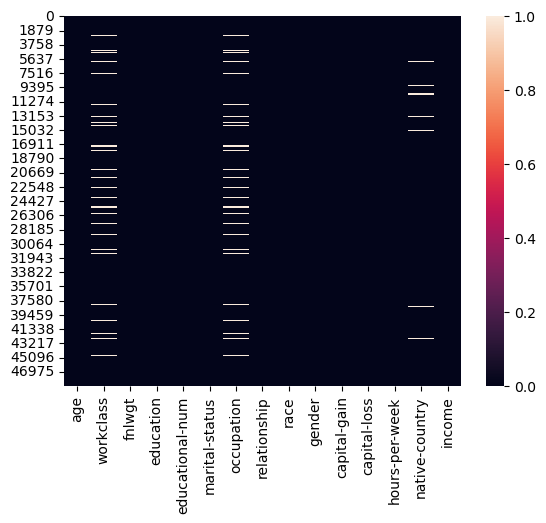

In [16]:
sns.heatmap(data.isnull())

# Drop the missing value

In [17]:
data.dropna(how='any', inplace=True)
data.shape

(45222, 15)

# check duplicate data then drop

In [19]:
data.duplicated().any()
data = data.drop_duplicates()
data.shape

(45175, 15)

# Overall statistics about the dataset

In [20]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
# We can see from this, 75% of capital-gain, capital-loss are 0 then we have to drop them

# drop colums

In [27]:
data = data.drop(['educational-num'], axis=1)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

# Univariable analysis

In [28]:
data['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

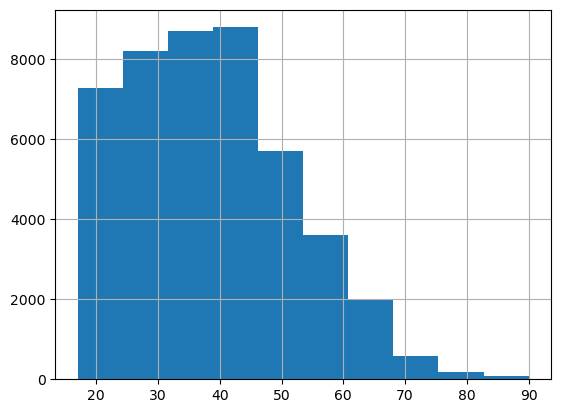

In [29]:
data['age'].hist()

# Number of persons having age between 17 and 48

In [35]:
sum((data['age']>=17) & (data['age']<=48))
#or
sum(data['age'].between(17,48))

34858

# number of persons having age 20 or 50 

In [37]:
sum((data['age']==20)|(data['age']==50))

1744

# Bivariate analysis, which is used to find relationship between 2 variables

<Axes: xlabel='income', ylabel='age'>

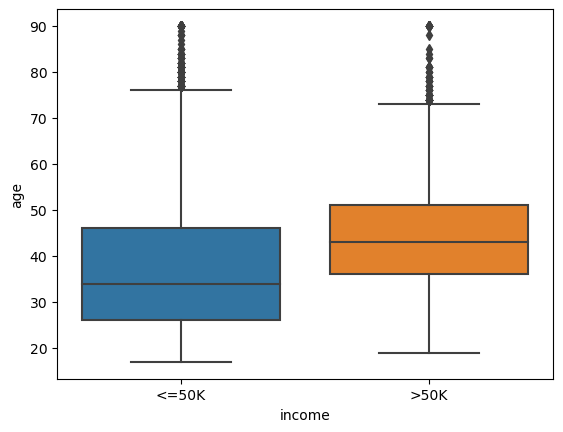

In [40]:
#relationship between income and age
sns.boxplot(x='income', y='age', data=data)

In [41]:
#This graphe show that most people younger have income <=50k and most people olger have income >50k

# Replace income <=50k and >50k by 0 and 1 respectively

In [42]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [53]:
sns.countplot(x='income',data=data)

ValueError: Could not interpret input 'income'

In [54]:
data.replace(to_replace=['<=50k','>50k'],value=[0,1],inplace=True)
data.head(5)

AttributeError: 'NoneType' object has no attribute 'replace'